                                Commodity Name Commodity Price
1                            Torborgee Oil 5KG            6.00
2                        Red Country Rice 25kg           35.00
3                           Panama Acheke 500g            2.00
4                   Kwaa Pa Natural Honey 150g            2.00
5                   Kwaa Pa Natural Honey 300g            4.00
6               Teinen Enterprise Ginger Chips            3.50
7              Teinen Enterprise Worlor Powder            6.00
8    Walking Eating Fortified Super Garri 500g            3.50
9                       Dry Rice Medicine 350g            2.00
10  Raw Snapper Fish Carton (Fresh Small Fish)           45.00


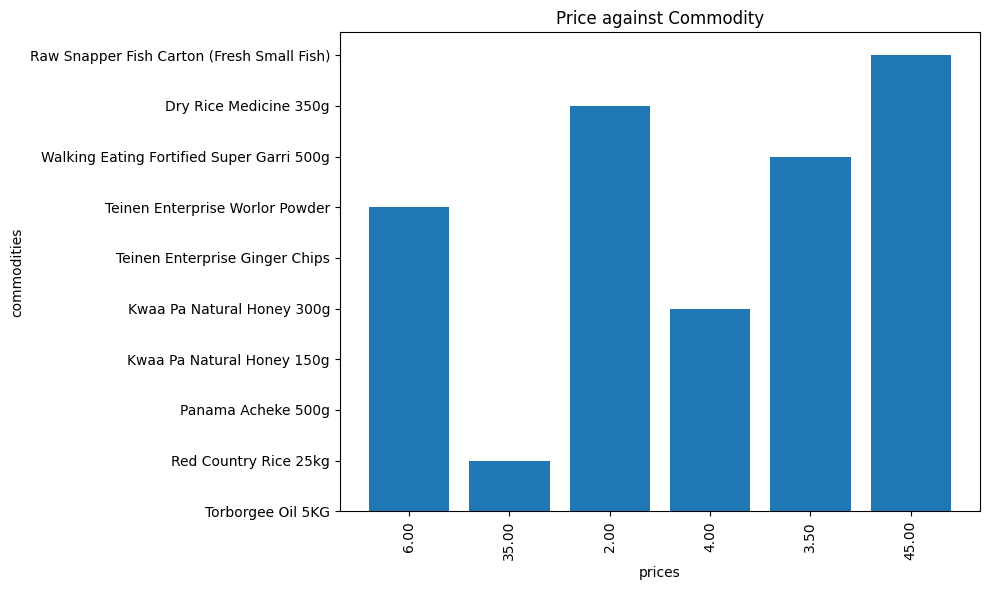

In [1]:
# Scraping data from ezeemarket Website - Using BeautifulSoup
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

Commodities        = []   # List to store names of the commodities 
Prices             = []     # List to store prices of the commoditie

sp = requests.get("https://www.ezeemarket.biz/")
sp = BeautifulSoup(sp.text, 'html.parser')

Stock_list = sp.find('div', attrs={'class':'comp-kpziq0kl'}).find_all('li')

for each in Stock_list:
    commodity = each.find('h3' , attrs={'class':'sFJHatI oO_iKqA---typography-11-runningText oO_iKqA---priority-7-primary syHtuvM FzO_a9','data-hook' :'product-item-name'})
    
    Commodities.append(commodity.text)
    
    price = each.find('div',attrs={'class':'UqnnNN'})
    
    Prices.append(price.text[6:])
    
    
df = pd.DataFrame({'Commodity Name': Commodities, 'Commodity Price': Prices}) # Create a Data frame and stored scraped data

df.index += 1

print(df.to_string())    



# Data Visualization- Create a bar chart for prices agains commodities
plt.figure(figsize=(10, 6))
plt.bar(df['Commodity Price'], df['Commodity Name'])
plt.xlabel('prices')
plt.ylabel('commodities')
plt.xticks(rotation=90)
plt.title('Price against Commodity')
plt.tight_layout()
plt.show()


   